In [1]:
import pandas as pd
import lightgbm as lgb
import Conversion
from Conversion import Data
from Conversion import Algorithm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dat = Data()
train, test = dat.Load(wd=Conversion.wd, data_list=Conversion.new_data)
dtrain_, dvalidation_ = dat.Engineering(validation_day=24)

In [ ]:
dvalidation_.shape

In [8]:
clf = lgb.LGBMClassifier(
    boosting_type='gbdt', 
    num_leaves=31, 
    max_depth=-1,                    #
    learning_rate=0.01,                     #
    n_estimators=500,                       #
    subsample_for_bin=200000, 
    objective=None, 
    class_weight=None, 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    min_child_samples=20, 
    subsample=0.75,                    #
    subsample_freq=1, 
    colsample_bytree=0.75,      #
    reg_alpha=0.0, 
    reg_lambda=0.0, 
    random_state=2018,                      #
    n_jobs=-1, 
    silent=True)

clf.fit(dtrain_[dat.predictors], dtrain_[dat.target], feature_name=dat.predictors)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.75,
        learning_rate=0.01, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
        n_jobs=-1, num_leaves=31, objective=None, random_state=2018,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.75,
        subsample_for_bin=200000, subsample_freq=1)

In [9]:
dvalidation_['predicted_score'] = clf.predict_proba(dvalidation_[dat.predictors])[:, 1]

In [10]:
from sklearn.metrics import log_loss

log_loss(dvalidation_[dat.target], dvalidation_['predicted_score'])

0.09957758930675385

In [11]:
alg = Algorithm(train=dtrain_, test=dvalidation_, target=dat.target, features=dat.predictors, validation_day=24)

In [13]:
# bsline = alg.Baseline()

In [14]:
clf_sim_1 = alg.simAnneal(alpha=0.99, scoring='neg_log_loss')

simulating...

INFO: Number of possible iterations given cooling schedule: 4582



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished


2 T: 10.0, score: -0.0000, std: 0.0000, params: {'max_depth': '14.00', 'subsample': '0.70', 'colsample_bytree': '0.79'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 31.8min finished


3 T: 10.0, score: -0.0000, std: 0.0000, params: {'max_depth': '15.00', 'subsample': '0.70', 'colsample_bytree': '0.79'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 216.4min finished


4 T: 10.0, score: -0.0000, std: 0.0000, params: {'max_depth': '15.00', 'subsample': '0.70', 'colsample_bytree': '0.49'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.5min finished


5 T: 10.0, score: -0.0000, std: 0.0000, params: {'max_depth': '20.00', 'subsample': '0.70', 'colsample_bytree': '0.49'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.3min finished


6 T: 10.0, score: -0.0001, std: 0.0000, params: {'max_depth': '20.00', 'subsample': '0.70', 'colsample_bytree': '0.41'}


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [4]:
clf_sim_2 = models.simAnneal(alpha=0.98, scoring='roc_auc')

simulating...

INFO: Number of possible iterations given cooling schedule: 2279



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min finished


2 T: 10.0, score: 0.6902, std: 0.0050, params: {'max_depth': '14.00', 'subsample': '0.99', 'colsample_bytree': '0.40'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished


3 T: 10.0, score: 0.6905, std: 0.0049, params: {'max_depth': '14.00', 'subsample': '0.90', 'colsample_bytree': '0.40'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


4 T: 10.0, score: 0.6706, std: 0.0041, params: {'max_depth': '14.00', 'subsample': '0.90', 'colsample_bytree': '0.01'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


5 T: 10.0, score: 0.6705, std: 0.0036, params: {'max_depth': '14.00', 'subsample': '0.09', 'colsample_bytree': '0.01'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


6 T: 10.0, score: 0.6704, std: 0.0036, params: {'max_depth': '13.00', 'subsample': '0.09', 'colsample_bytree': '0.01'}

best score: 0.690520 
log loss: 0.082087 
best parameters: {'max_depth': '14.00', 'subsample': '0.90', 'colsample_bytree': '0.40'}


In [5]:
clf_sim_3 = models.simAnneal(alpha=0.98, scoring='neg_log_loss', seed=0)

simulating...

INFO: Number of possible iterations given cooling schedule: 2279



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


2 T: 10.0, score: -0.0900, std: 0.0029, params: {'max_depth': '4.00', 'subsample': '0.16', 'colsample_bytree': '0.62'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


3 T: 10.0, score: -0.0900, std: 0.0029, params: {'max_depth': '4.00', 'subsample': '0.92', 'colsample_bytree': '0.62'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished


4 T: 10.0, score: -0.0900, std: 0.0029, params: {'max_depth': '4.00', 'subsample': '0.87', 'colsample_bytree': '0.62'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


5 T: 10.0, score: -0.0898, std: 0.0029, params: {'max_depth': '11.00', 'subsample': '0.87', 'colsample_bytree': '0.62'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


6 T: 10.0, score: -0.0898, std: 0.0029, params: {'max_depth': '11.00', 'subsample': '0.87', 'colsample_bytree': '0.83'}

best score: -0.089830 
log loss: 0.082067 
best parameters: {'max_depth': '11.00', 'subsample': '0.87', 'colsample_bytree': '0.83'}


In [6]:
clf_sim_4 = models.simAnneal(alpha=0.99, scoring='neg_log_loss', seed=0)

simulating...

INFO: Number of possible iterations given cooling schedule: 4582



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min finished


2 T: 10.0, score: -0.0898, std: 0.0029, params: {'max_depth': '15.00', 'subsample': '0.68', 'colsample_bytree': '0.86'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.9min finished


3 T: 10.0, score: -0.0898, std: 0.0029, params: {'max_depth': '9.00', 'subsample': '0.68', 'colsample_bytree': '0.86'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


4 T: 10.0, score: -0.0898, std: 0.0029, params: {'max_depth': '18.00', 'subsample': '0.68', 'colsample_bytree': '0.86'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min finished


5 T: 10.0, score: -0.0899, std: 0.0029, params: {'max_depth': '18.00', 'subsample': '0.68', 'colsample_bytree': '0.97'}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.7min finished


6 T: 10.0, score: -0.0915, std: 0.0029, params: {'max_depth': '18.00', 'subsample': '0.68', 'colsample_bytree': '0.11'}

best score: -0.089812 
log loss: 0.082051 
best parameters: {'max_depth': '9.00', 'subsample': '0.68', 'colsample_bytree': '0.86'}


In [15]:
eng_train, eng_test = dat.Load(wd=Conversion.wd, data_list=Conversion.eng_data)

In [33]:
clf = lgb.LGBMClassifier(
    boosting_type='gbdt', 
    num_leaves=31, 
    max_depth=9,                    #
    learning_rate=0.01,                     #
    n_estimators=500,                       #
    subsample_for_bin=200000, 
    objective=None, 
    class_weight=None, 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    min_child_samples=20, 
    subsample=0.68,                    #
    subsample_freq=1, 
    colsample_bytree=0.86,      #
    reg_alpha=0.0, 
    reg_lambda=0.0, 
    random_state=2018,                      #
    n_jobs=-1, 
    silent=True)
# clf.fit(dtrain_[dat.predictors], dtrain_[dat.target], feature_name=dat.predictors)

lgb_train = lgb.Dataset(dtrain_[dat.predictors], dtrain_[dat.target], free_raw_data=False)
lgb_eval = lgb.Dataset(dvalidation_[dat.predictors], dvalidation_[dat.target], reference=lgb_train, free_raw_data=False)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.86,
    'bagging_fraction': 0.68,
    'bagging_freq': 5,
    'verbose': 1
}

print('Start training...')
# feature_name and categorical_feature
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                valid_sets=lgb_eval,  # eval training data
                feature_name=dat.predictors)


# save model to file
gbm.save_model('model_2.txt')

# feature importances
print('Feature importances:', list(gbm.feature_importance()))

# load model to predict
print('Load model to predict')
bst = lgb.Booster(model_file='model_2.txt')
# can only predict with the best iteration (or the saving iteration)
prediction = bst.best_iteration.predict_proba(test[dat.predictors])[:,1]


# output = pd.DataFrame()
# prediction = pd.DataFrame(clf.predict_proba(eng_test[dat.predictors])[:,1])
# output['instance_id'] = test['instance_id']
# output['predicted_score'] = prediction

# output.head()

Start training...
[1]	valid_0's binary_logloss: 0.683535
[2]	valid_0's binary_logloss: 0.674117
[3]	valid_0's binary_logloss: 0.664887
[4]	valid_0's binary_logloss: 0.655839
[5]	valid_0's binary_logloss: 0.646969
[6]	valid_0's binary_logloss: 0.638271
[7]	valid_0's binary_logloss: 0.62974
[8]	valid_0's binary_logloss: 0.621373
[9]	valid_0's binary_logloss: 0.613163
[10]	valid_0's binary_logloss: 0.605108
Feature importances: [7, 9, 1, 1, 0, 1, 0, 3, 0, 2, 2, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Load model to predict


AttributeError: 'int' object has no attribute 'predict_proba'

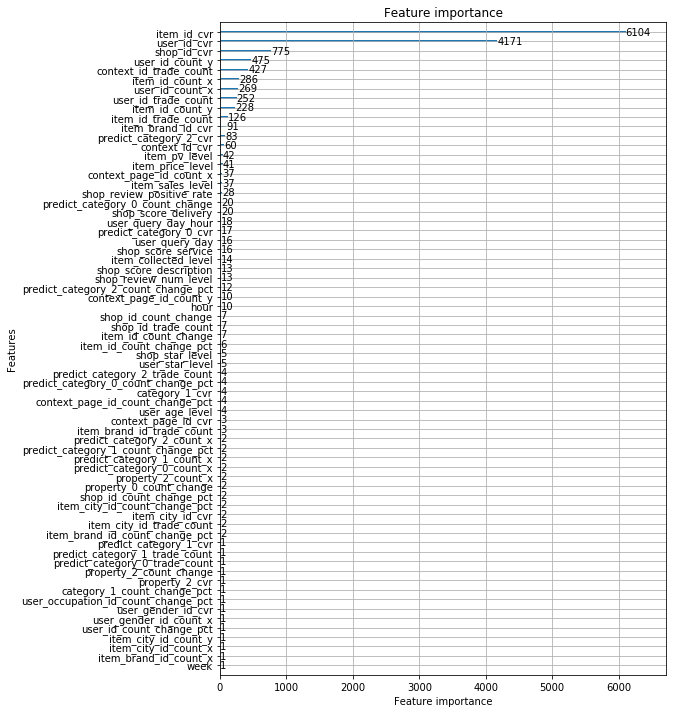

In [31]:
lgb.plot_importance(clf, figsize=(8,12))

In [20]:
output['predicted_score'].mean()

0.003360747324018415

In [27]:
wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'

output.to_csv(wd+'result_2.txt', index=False, sep=' ')

0.024673150379262147


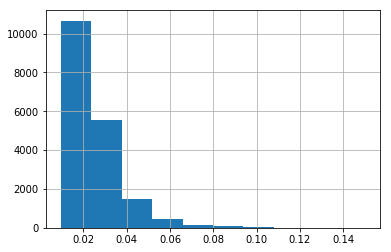

In [26]:
wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'

output_1 = pd.read_csv(wd+'result_1.txt', sep=' ')
print(output_1.predicted_score.mean())
output_1.predicted_score.hist()